In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
from google.colab.patches import cv2_imshow
import copy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


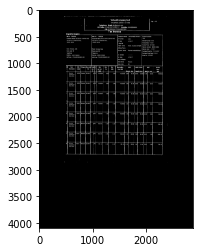

In [ ]:
def threshAndConvert(imgpath):
  """
  The function to apply threshold to image.
  Parameters: 
            imgpath(String): The path of image to which threshold to be applied. 

        Returns: 
            array[int] :  input image 
            array[int] :  threshed image 
  """
  img = cv2.imread(imgpath,0)
  #cv2_imshow(img)
  thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU) 
  thresh_img = 255-img_bin
  plotting = plt.imshow(thresh_img,cmap='gray')
  plt.show()
  return img,thresh_img

#img,threshed = threshAndConvert("output/dataset1/1.jpg")

In [ ]:
def getLines(img):
  """
  The function to generate two kernels 
  Parameters: 
            array[int] : original image 

        Returns: 
            array[int] : kernel mask to apply masking 
            array[int] : vertical mask to apply masking
            array[int] : horizontal mask to apply masking
  """
  kernel_len = np.array(img).shape[1]//100
  ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
  hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
  return kernel,ver_kernel, hor_kernel

#kernel,vertical,horizontal = getLines(img)
 

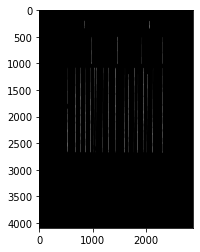

In [ ]:
def getVertical(img,vertical):
  """
  The function to apply erosion and dilation with vertical kernal
  Parameters: 
            array[int] : original image 
            array[int] : vertical mask to apply masking

        Returns: 
            array[int] : eroded image            
            array[int] : dilated image
  """
  image_1 = cv2.erode(img, vertical, iterations=3)
  lines = cv2.dilate(image_1, vertical, iterations=3)
  plotting = plt.imshow(image_1,cmap='gray')
  plt.show()
  return image_1,lines

#vert_img , vert_lines= getVertical(threshed,vertical) 

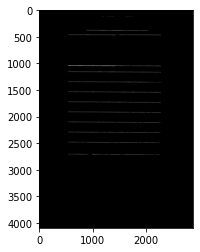

In [ ]:
def getHorizontal(img,horizontal):
  """
  The function to apply erosion and dilation with horizontal kernal
  Parameters: 
            array[int] : original image 
            array[int] : horizontal mask to apply masking

        Returns: 
            array[int] : eroded image            
            array[int] : dilated image
  """
  image_2 = cv2.erode(img, horizontal, iterations=3)
  lines = cv2.dilate(image_2, horizontal, iterations=3)
  plotting = plt.imshow(image_2,cmap='gray')
  plt.show()
  return image_2,lines

#hor_img, hor_lines = getHorizontal(threshed,horizontal)


In [ ]:
def AddWeight(img,vert_lines,hor_lines,kernel):
  """
  The function to perform bit xor and not operations
  Parameters: 
            array[int] : original image 
            array[int] : vertical mask to apply masking
            array[int] : horizontal mask to apply masking
            array[int] : kernel mask to apply masking

        Returns: 
            array[int] : weighted image            
            array[int] : inverted image
  """
  img_vh = cv2.addWeighted(vert_lines, 0.5, hor_lines, 0.5, 0.0)
  img_vh = cv2.erode(~img_vh, kernel, iterations=2)
  thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  bitxor = cv2.bitwise_xor(img,img_vh)
  bitnot = cv2.bitwise_not(bitxor)
  return img_vh, bitnot


#TableImg,bitnot = AddWeight(img,vert_lines,hor_lines,kernel)



In [ ]:
def findContours(timg):
  """
  The function to find contours using cv2.findContours()
  Parameters: 
            array[int] : weighted image 

        Returns: 
            array[array[int]] : contours            
            array[array[array[int]]] : hierarchy
  """
  return cv2.findContours(timg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#contours, hierarchy = findContours(TableImg)
#print(contours[0])
#print(len(contours))
#print(len(hierarchy))  

[[[   0    0]]

 [[   0 4093]]

 [[2892 4093]]

 [[2892    0]]]
158
1


[11836956.0, 3772958.0, 39001.5, 21716.0, 13611.5, 21503.0, 13423.5, 21846.5, 13774.0, 36755.0, 27016.5, 21877.0, 27036.0, 6879.5, 12883.0, 19053.0, 19950.0, 19082.0, 31133.5, 32730.0, 18332.0, 11534.5, 18187.5, 11302.0, 18320.0, 11735.0, 30896.0, 22580.0, 18191.0, 22538.0, 5676.0, 10634.5, 15905.0, 16548.5, 15925.5, 25988.5, 32760.0, 18273.5, 11562.5, 18267.5, 11335.0, 18314.5, 11612.5, 30917.5, 22567.5, 18308.5, 22460.0, 5730.0, 10623.0, 15817.5, 16576.5, 15988.0, 26015.0, 32635.0, 18330.0, 11428.0, 18178.0, 11293.0, 18275.0, 11572.5, 30813.5, 22394.0, 18147.0, 22321.0, 5627.0, 10562.5, 15797.5, 16478.5, 15767.0, 25843.5, 32557.0, 18235.5, 11456.5, 18092.0, 11210.5, 18150.0, 11610.0, 30576.5, 22329.5, 18063.5, 22337.5, 5556.0, 10460.5, 15670.5, 16391.0, 15705.5, 25774.5, 32651.5, 18248.0, 11508.0, 18302.0, 11463.5, 18296.0, 11608.5, 30940.0, 22450.0, 18300.0, 22499.0, 5669.0, 10551.0, 15730.5, 16478.5, 15797.0, 25984.0, 32688.0, 18289.5, 11424.5, 18108.5, 11356.5, 18241.0, 11462.5, 3

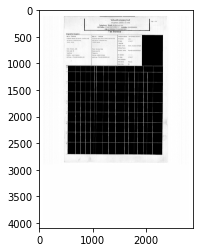

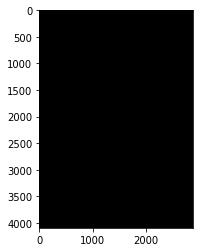

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
def cropForText(contours,img):
  """
  The function to crop part of tabular image from original image
  Parameters: 
            array[array[int]] : contours
            array[int] : original image 

        Returns: 
            array[int] : cropped image 
  """
  crops = copy.copy(img)
  mask = np.ones(crops.shape[:2], dtype="uint8") * 255
  area = []
  for c in contours:
    a = cv2.contourArea(c)
    area.append(a)
  
  print(area)
  avg = 2*(sum(area)/len(area))
  print(avg)
  for c in contours:
    a = cv2.contourArea(c)
    if a<avg:
      cv2.drawContours(mask, [c], 0, 0, -1)
  cropped = cv2.bitwise_and(crops, crops, mask=mask)
  plotting = plt.imshow(cropped,cmap='gray')
  plt.show()
  cropped2 = cv2.subtract(img,cropped, mask=mask)
  plotting = plt.imshow(cropped2,cmap='gray')
  plt.show()
  return cropped

#cropForText(contours,img)

In [ ]:
def sort_contours(cnts, method="left-to-right"):
    """
  The function to sort all contours and generate box coordinates
  Parameters: 
            array[array[int]] : contours

        Returns: 
            array[array[int]] : sorted contours
            array[array[int]] : bounding boxes
  """
    reverse = False
    if method == "right-to-left" or method == "bottom-to-top":
      reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
      i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)


#contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")
#print(contours[0])
#print(boundingBoxes[0])
#print(boundingBoxes[len(boundingBoxes)-1])


[[[   0    0]]

 [[   0 4093]]

 [[2892 4093]]

 [[2892    0]]]
(0, 0, 2893, 4094)
(2135, 2495, 181, 221)


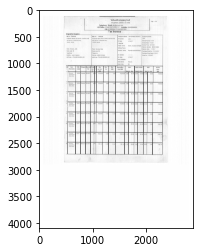

224.81645569620252


In [ ]:
def createBoxes(img,contours,boundingBoxes):
  """
  The function to draw boxes in image and calculate mean of box heights
  Parameters: 
            array[int] : original image
            array[array[int]] : contours
            array[array[int]] : bounding boxes
        Returns: 
            array[array[int]] : box with x,y coordinates and width, height
            int:mean of hieghts of boxes
  """
  heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
  mean = np.mean(heights)  
  box = []
  for c in contours:
      x, y, w, h = cv2.boundingRect(c)
      if (w<1000 and h<500):
          image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
          box.append([x,y,w,h])
  plotting = plt.imshow(image,cmap='gray')
  plt.show()
  return box,mean

#box,mean = createBoxes(img,contours,boundingBoxes)
#print(mean)

In [ ]:
def detectCells(box,mean):
  """
  The function to arrange every boxes based on rows and columns
  Parameters: 
            array[array[int]] : bounding boxes
        
        Returns: 
            array[array[int]] : Column-wise boxes
            array[array[int]] : row-wise boxes
  """
  row=[]
  column=[]
  j=0
  #Sorting the boxes to their respective row and column
  for i in range(len(box)):
    if(i==0):
      column.append(box[i])
      previous=box[i]
    else:
      if(box[i][1]<=previous[1]+mean/2):
        column.append(box[i])
        previous=box[i]
        if(i==len(box)-1):
          row.append(column)
      else:
        row.append(column)
        column=[]
        previous = box[i]
        column.append(box[i])
  print(column)
  print(row)
  return column,row    

#column,row = detectCells(box,mean)
  

[[538, 2483, 145, 222], [687, 2484, 88, 221], [780, 2485, 92, 221], [970, 2486, 60, 220], [877, 2486, 88, 220], [1071, 2487, 125, 221], [1034, 2487, 33, 219], [1306, 2488, 125, 221], [1200, 2488, 102, 220], [1435, 2489, 171, 221], [1680, 2491, 102, 219], [1610, 2491, 66, 218], [1786, 2492, 64, 218], [1854, 2493, 102, 218], [2029, 2494, 103, 219], [1960, 2494, 65, 218], [2135, 2495, 181, 221]]
[[[1575, 117, 231, 5], [1138, 117, 429, 6]], [[546, 1049, 144, 108], [1619, 1050, 171, 112], [1444, 1050, 170, 111], [885, 1050, 87, 109], [788, 1050, 92, 108], [695, 1050, 88, 108], [1795, 1051, 170, 112], [1080, 1051, 123, 108], [1043, 1051, 31, 108], [978, 1051, 59, 108], [1970, 1052, 171, 112], [1315, 1052, 124, 108], [1209, 1052, 100, 108], [2146, 1053, 179, 113], [545, 1162, 145, 184], [787, 1163, 92, 184], [694, 1163, 88, 183], [1041, 1164, 33, 183], [977, 1164, 60, 183], [884, 1164, 88, 183], [1208, 1165, 101, 183], [1079, 1165, 124, 183], [1443, 1166, 171, 184], [1314, 1166, 124, 183], [1

In [ ]:

def finaliseBoxes(row):
  """
  The function to place the box equidistant from the center.
  Parameters: 
            array[array[int]] : row-wise boxes
        
        Returns: 
            array[array[int]] : final boxes
            int : column count
  """
  countcol = 0
  for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
      countcol = countcol
  center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
  center=np.array(center)
  center.sort()
  finalboxes = []
  for i in range(len(row)):
    lis=[]
    for k in range(countcol):
      lis.append([])
    for j in range(len(row[i])):
      diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
      minimum = min(diff)
      indexing = list(diff).index(minimum)
      lis[indexing].append(row[i][j])
    finalboxes.append(lis)
  return finalboxes,countcol

#finalbox,columncounts = finaliseBoxes(row)
  


In [ ]:

def extractText(finalboxes,bitnot):
  """
  The function to extract text from image.
  Parameters: 
            array[array[int]] : final boxes
            array[int] : inverted boxes
        
        Returns: 
            List[String] : list of extractd strings
  """
  outer=[]
  for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
      inner=''
      if(len(finalboxes[i][j])==0):
        outer.append(' ')
      else:
        for k in range(len(finalboxes[i][j])):
          y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
          finalimg = bitnot[x:x+h, y:y+w]
          kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
          border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
          resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
          dilation = cv2.dilate(resizing, kernel,iterations=1)
          erosion = cv2.erode(dilation, kernel,iterations=1)
          out = pytesseract.image_to_string(erosion)
          if(len(out)==0):
            out = pytesseract.image_to_string(erosion, config='--psm 3')
          inner = inner +" "+ out
        outer.append(inner)
  return outer


#outer= extractText(finalbox,bitnot)
#print(outer)

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' Item,\nDescription Dummy\nproduct for\nevaluation', ' HSN\nCODE 6203', ' Category Bottom', ' Size wise\nQty 2134/2', ' Total\nOty ', ' UQ ', ' per Unit\n(INR) 1523.04', ' Disc.\n(%) 0.00', ' (INR) 0.00', ' Basic selling\nPrice (INR) 1523.04', ' CGST\n\n_ Rate(%) Amt ', ' ', ' SGST/UTGST\n\n_ Rate(%) Amt 2.50', ' 38.08', ' IGST\n\nRate(%) Amt 0.00', ' 0.00', ' Invoice\nValue\n(INR) 1599.20', ' Dummy\nproduct for\nevaluation', ' 6203', ' Bottom', ' 2/34/2', ' ', ' ', ' 1523.04', ' ', ' 0.00', ' 1523.04', ' ', ' 38.08', ' 2.50', ' 38.08', ' 0.00', ' ', ' 1599.20', ' Dummy\nproduct for\nevaluation', ' ', ' Bottom', ' ', ' ', ' ', ' 1523.04', ' ', ' ', ' 1523.04', ' 2.50', ' 38.08', ' | 2.50', ' 38.08', ' 0.00', ' 0.00', ' 1599.20', ' Dummy\nproduct for\nevaluation', ' ', ' Bottom', ' ne', ' ', ' ', ' 1523.04', ' 0.00', ' 0.00', ' 1523.04', ' ', ' 38.08', ' 2.50', ' | 38.08', ' ', ' 0.00', ' 1599.20', ' 

In [ ]:
#Creating a dataframe of the generated OCR list
def exportOCR(outer,row,countcol,excelpath):
  """
  The function to write dataframe to excel sheet.
  Parameters: 
            List[String] : list extracted string
            array[array[int]] : row-wise boxes
            int : column counts
            String : path to output excel file
        
        Returns: 
            Dataframe : dataframe of extracted text
  """
  arr = np.array(outer)
  dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
  print(dataframe)
  data = dataframe.style.set_properties(align="left")
  #Converting it in a excel-file
  data.to_excel(excelpath)
  return data

#exportOCR(outer,row,columncounts,"output/dataset1/excel1.xlsx")


TypeError: ignored

In [ ]:
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    """
  The function to construct image only with table
  Parameters: 
            Dataframe : dataframe of extracted text
            properties : All the properties to format table in image
        
        Returns: 
            figure : figure of constructed table 
  """

    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax




In [ ]:

def textExtraction(imgpath,excelpath,destpath):
  """
  The function to call all the helper methods to extract text from image
  Parameters: 
            String : input image path
            String : output excel path
            String : output table image path
        
        Returns: 
            Dataframe : dataframe of extracted text
            array[int]] : cropped image matrix
  """
  img,threshed = threshAndConvert(imgpath)
  kernel,vertical,horizontal = getLines(img)
  vert_img , vert_lines= getVertical(threshed,vertical) 
  hor_img, hor_lines = getHorizontal(threshed,horizontal)
  TableImg,bitnot = AddWeight(img,vert_lines,hor_lines,kernel)
  contours, hierarchy = findContours(TableImg)
  print(len(contours))
  print(len(hierarchy))
  contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")
  cropped = cropForText(contours,img)
  box,mean = createBoxes(img,contours,boundingBoxes)
  print(mean)
  column,row = detectCells(box,mean)
  finalbox,columncounts = finaliseBoxes(row)
  outer = extractText(finalbox,bitnot)
  print(outer)
  data = exportOCR(outer,row,columncounts,excelpath)
  x = render_mpl_table(data.data, header_columns=0, col_width=2.0)
  x.get_figure().savefig(destpath)
  return cropped,data



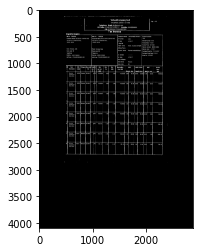

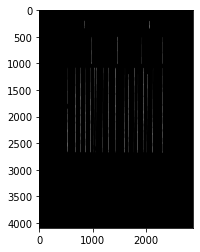

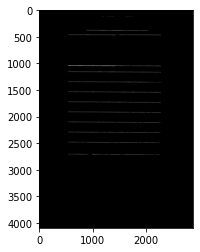

158
1
[11836956.0, 918.0, 1746.0, 10952.5, 3772958.0, 261682.0, 270790.5, 221915.5, 15203.0, 18749.0, 18450.0, 9195.0, 9657.5, 9251.5, 18571.5, 13008.5, 3210.0, 6186.0, 18597.5, 12951.0, 10573.5, 19587.5, 25900.0, 16502.5, 15738.0, 5578.5, 10596.0, 15792.0, 18071.5, 22295.5, 30653.0, 22317.0, 18117.0, 11598.0, 18149.0, 11329.5, 18291.0, 11457.0, 32428.0, 25843.5, 15750.0, 10493.5, 15697.0, 16390.0, 18200.0, 22234.5, 5643.0, 30700.0, 22292.0, 11356.5, 18241.0, 11462.5, 32688.0, 18289.5, 11424.5, 18108.5, 25984.0, 15797.0, 15730.5, 16478.5, 18300.0, 22499.0, 5669.0, 10551.0, 22450.0, 30940.0, 18296.0, 11608.5, 18302.0, 11463.5, 11508.0, 32651.5, 18248.0, 25774.5, 15670.5, 16391.0, 15705.5, 22337.5, 5556.0, 10460.5, 18063.5, 30576.5, 22329.5, 11610.0, 18150.0, 18092.0, 11210.5, 18235.5, 11456.5, 32557.0, 15767.0, 25843.5, 15797.5, 16478.5, 22321.0, 5627.0, 10562.5, 18147.0, 22394.0, 30813.5, 18275.0, 11572.5, 11293.0, 11428.0, 18178.0, 18330.0, 32635.0, 26015.0, 15988.0, 15817.5, 16576.5,

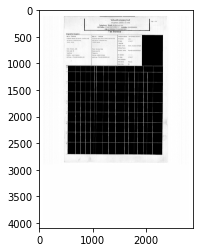

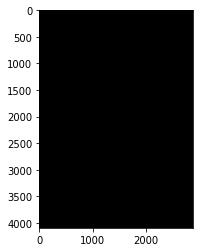

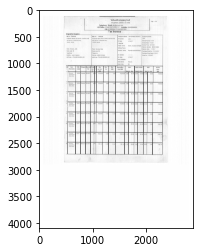

224.81645569620252
[[538, 2483, 145, 222], [687, 2484, 88, 221], [780, 2485, 92, 221], [970, 2486, 60, 220], [877, 2486, 88, 220], [1071, 2487, 125, 221], [1034, 2487, 33, 219], [1306, 2488, 125, 221], [1200, 2488, 102, 220], [1435, 2489, 171, 221], [1680, 2491, 102, 219], [1610, 2491, 66, 218], [1786, 2492, 64, 218], [1854, 2493, 102, 218], [2029, 2494, 103, 219], [1960, 2494, 65, 218], [2135, 2495, 181, 221]]
[[[1575, 117, 231, 5], [1138, 117, 429, 6]], [[546, 1049, 144, 108], [1619, 1050, 171, 112], [1444, 1050, 170, 111], [885, 1050, 87, 109], [788, 1050, 92, 108], [695, 1050, 88, 108], [1795, 1051, 170, 112], [1080, 1051, 123, 108], [1043, 1051, 31, 108], [978, 1051, 59, 108], [1970, 1052, 171, 112], [1315, 1052, 124, 108], [1209, 1052, 100, 108], [2146, 1053, 179, 113], [545, 1162, 145, 184], [787, 1163, 92, 184], [694, 1163, 88, 183], [1041, 1164, 33, 183], [977, 1164, 60, 183], [884, 1164, 88, 183], [1208, 1165, 101, 183], [1079, 1165, 124, 183], [1443, 1166, 171, 184], [1314, 

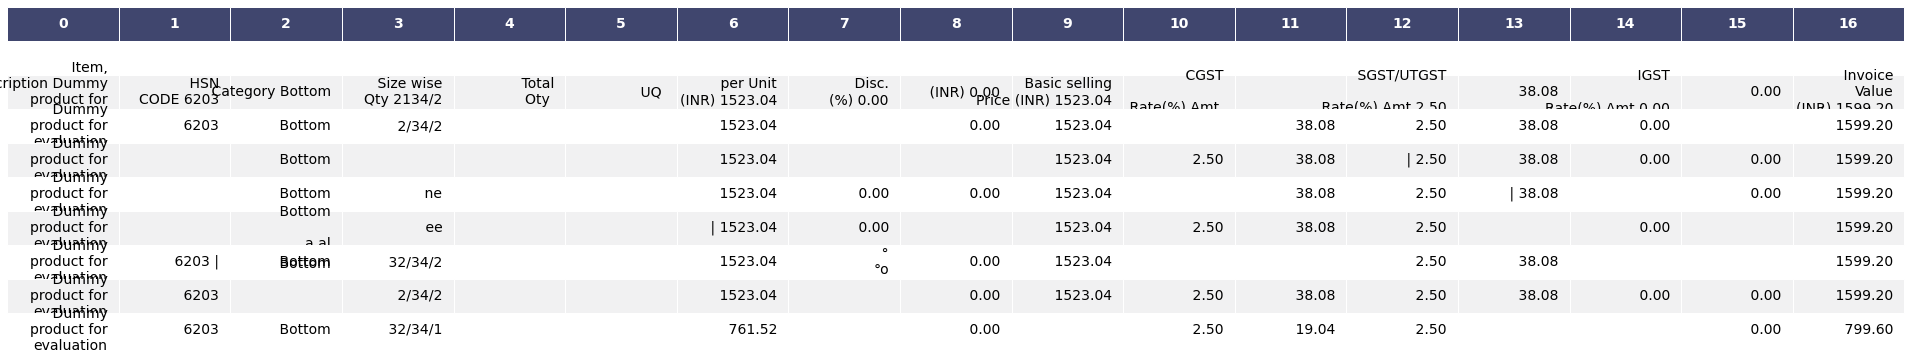

In [ ]:
#cropped,data = textExtraction("output/dataset1/1.jpg","output/dataset1/excel1.xlsx","output/dataset1/desttable1.jpg")